# Data Collection

##### Importing the required libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Storing the dataset into a dataframe

In [15]:
car=pd.read_csv('car data.csv')
car

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


# Data Cleaning

##### Checking for NULL values

In [16]:
car.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


# Data Visualization

##### Visualizing the datasets using a pairplot

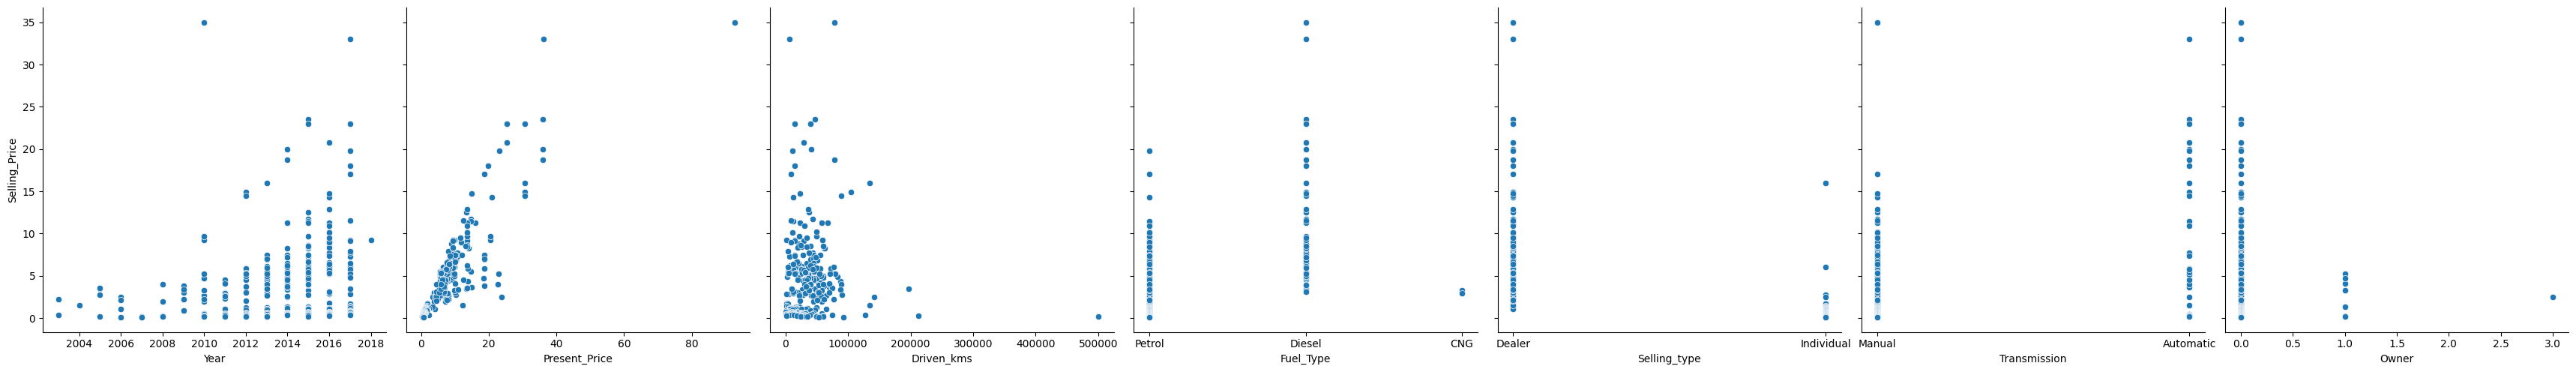

In [17]:
sns.pairplot(car,x_vars=['Year', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'], y_vars=['Selling_Price'], height=5, aspect=1, kind='scatter')
plt.show()

# Data Preparation

##### Converting the categorical columns into numerical values

In [18]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
car['Fuel_Type'] = label_encoder.fit_transform(car['Fuel_Type'])
car['Selling_type'] = label_encoder.fit_transform(car['Selling_type'])
car['Transmission'] = label_encoder.fit_transform(car['Transmission'])
car

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,1,0
297,brio,2015,4.00,5.90,60000,2,0,1,0
298,city,2009,3.35,11.00,87934,2,0,1,0
299,city,2017,11.50,12.50,9000,1,0,1,0


##### Loading the inependent and dependent variables into x and y respectively

In [19]:
X = car[['Year', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner']]
y = car['Selling_Price']

##### Splitting the data into training and testing sets

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=133)

# Model Training

##### Using polynomial regression for model training
***97% accuracy model***

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)
poly_model.score(X_test,y_test)

0.9743823831895491

# Model Evaluation

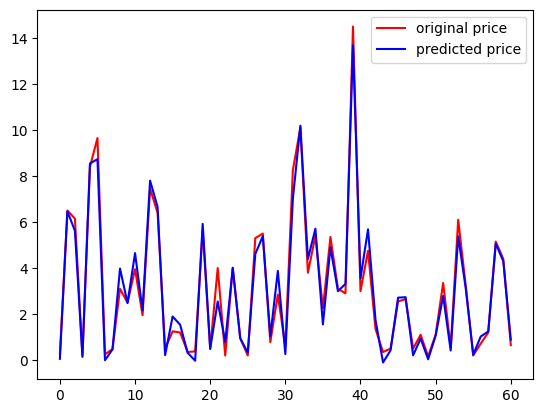

In [22]:
y_pred=poly_model.predict(X_test)
x=np.arange(len(y_pred))
plt.plot(x,y_test,color='red',label='original price')
plt.plot(x,y_pred,color='blue',label='predicted price')
plt.legend()
plt.show()